# SEGMENTAÇÃO E CLASSIFICAÇÃO DE IMAGENS DIGITAIS
- Prof: Yuri Sá
- Clustering

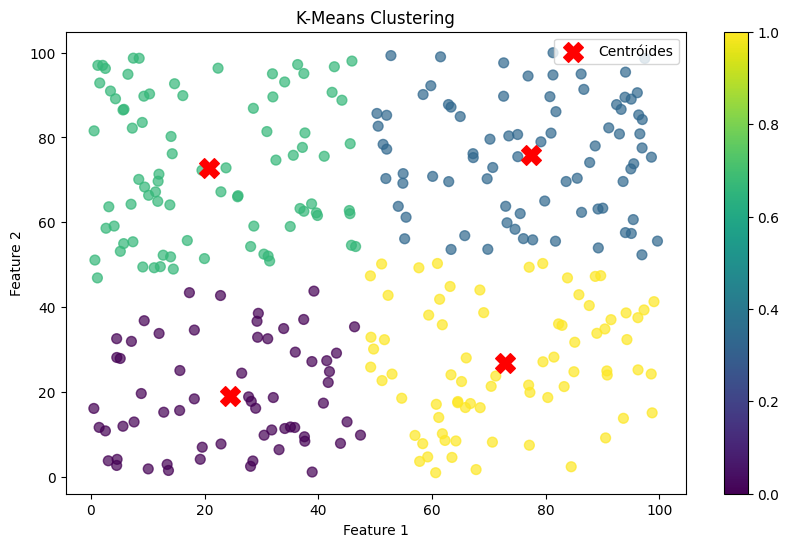

Centróides encontrados:
[[24.38372227 19.12536345]
 [77.32936687 75.86361322]
 [20.70386805 72.80977147]
 [72.85221804 26.7004387 ]]


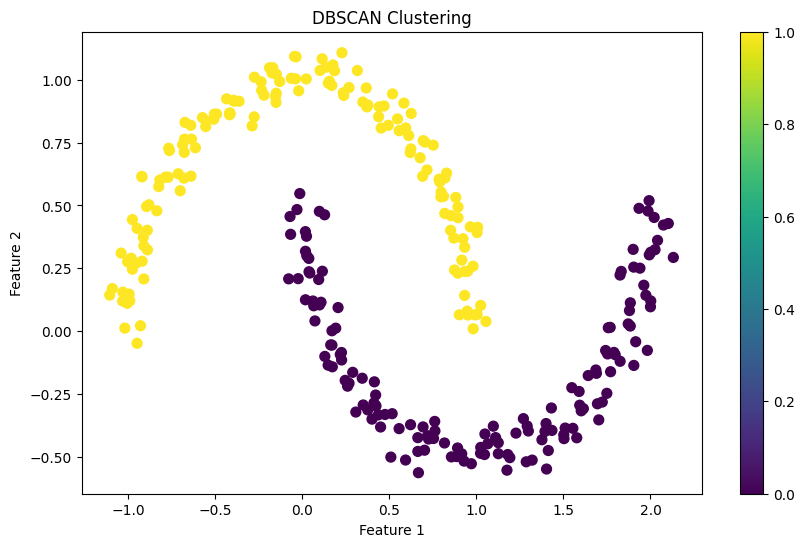

Número de clusters: 2
Pontos considerados ruído: 0


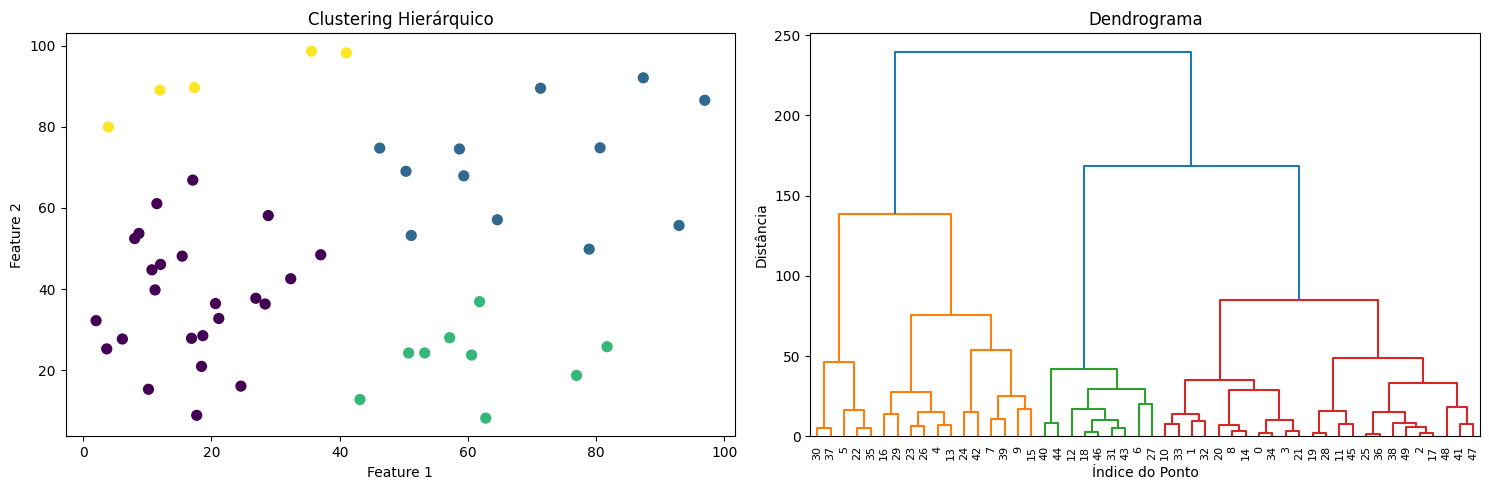

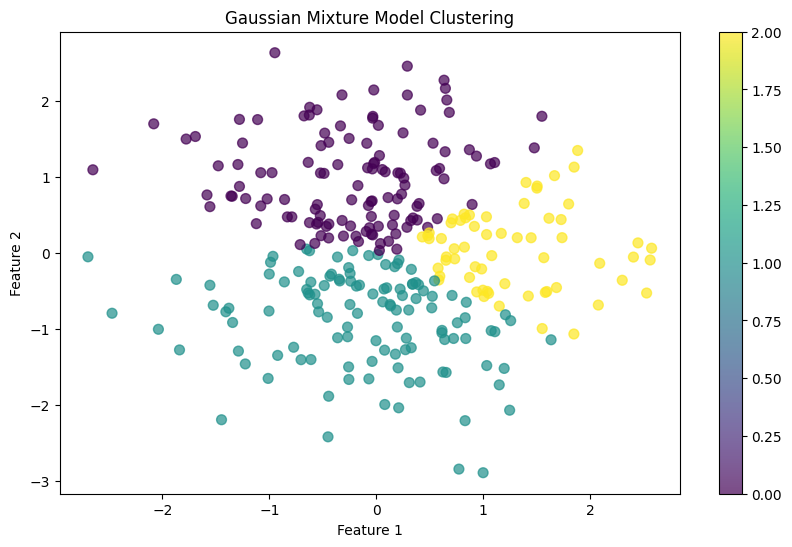

Médias dos componentes:
[[-0.14461909  0.85007104]
 [-0.06063806 -0.72543748]
 [ 0.87345082 -0.01484647]]


In [9]:
# 1. K-Means Clustering (Mais Comum)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import cv2



# Criar dados de exemplo
np.random.seed(42)

# Dados aleatórios
dados = np.random.rand(300, 2) * 100

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rotulos = kmeans.fit_predict(dados)
centroides = kmeans.cluster_centers_

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(dados[:, 0], dados[:, 1], c=rotulos, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centróides')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar()
plt.show()

print(f"Centróides encontrados:\n{centroides}")


#2. K-Means para Processamento de Imagens
def clustering_imagem_kmeans(caminho_imagem, k=3):
    """
    Aplica K-Means para segmentação de imagens por cor
    """
    # Carregar imagem
    img = cv2.imread(caminho_imagem)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Redimensionar para array 2D
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Aplicar K-Means
    criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, rotulos, centros = cv2.kmeans(pixel_values, k, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Converter back para uint8
    centros = np.uint8(centros)
    img_segmentada = centros[rotulos.flatten()]
    img_segmentada = img_segmentada.reshape(img.shape)
    
    return img, img_segmentada, centros

# Exemplo de uso
 #img_original, img_cluster, cores = clustering_imagem_kmeans('../imagens/audi.png', k=4)
 
 #3. DBSCAN (Density-Based Spatial Clustering)


# Criar dados não-lineares
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
rotulos_dbscan = dbscan.fit_predict(X)

# Visualizar
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=rotulos_dbscan, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

n_clusters = len(set(rotulos_dbscan)) - (1 if -1 in rotulos_dbscan else 0)
n_ruido = list(rotulos_dbscan).count(-1)
print(f"Número de clusters: {n_clusters}")
print(f"Pontos considerados ruído: {n_ruido}")



# Dados de exemplo
dados_hierarquico = np.random.rand(50, 2) * 100

# Clustering Hierárquico Aglomerativo
# 'affinity' was removed in newer scikit-learn versions; use 'metric' instead.
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rotulos_hc = hc.fit_predict(dados_hierarquico)

# Dendrograma
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(dados_hierarquico[:, 0], dados_hierarquico[:, 1], c=rotulos_hc, cmap='viridis', s=50)
plt.title('Clustering Hierárquico')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
Z = linkage(dados_hierarquico, 'ward')
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice do Ponto')
plt.ylabel('Distância')

plt.tight_layout()
plt.show()

# Dados de exemplo
dados_gmm = np.random.randn(300, 2)

# Aplicar GMM
gmm = GaussianMixture(n_components=3, random_state=42)
rotulos_gmm = gmm.fit_predict(dados_gmm)

# Visualizar
plt.figure(figsize=(10, 6))
plt.scatter(dados_gmm[:, 0], dados_gmm[:, 1], c=rotulos_gmm, cmap='viridis', s=50, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

print(f"Médias dos componentes:\n{gmm.means_}")
 

